In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

df1 = pd.read_csv("insurance.csv")
df2 = pd.read_csv("insurance.csv")

df2.loc[df2['sex'] == 'male', 'sex'] = 1
df2.loc[df2['sex'] == 'female', 'sex'] = 0
df2.loc[df2['smoker'] == 'yes', 'smoker'] = 1
df2.loc[df2['smoker'] == 'no','smoker'] = 0
df2.loc[df2['region'] == 'southeast','region'] = 3
df2.loc[df2['region'] == 'northwest','region'] = 2
df2.loc[df2['region'] == 'southwest','region'] = 4
df2.loc[df2['region'] == 'northeast','region'] = 1

# print(df2)

standardized_df2 = (df2-df2.mean())/df2.std()
# standardize_df2_mean = round(np.mean(standardize_df2['age']),2)
standardized_df2_mean = round(standardized_df2.mean(),0)
standardized_df2_var = standardized_df2.var()


print("mean of standardized data : ",standardized_df2_mean)
print("variance of standardized data : ",standardized_df2_var)


for column in df2:
    if column != 'charges':
        df2[column] = (df2[column] - df2[column].mean())/df2[column].std()

print(df2)        

# # normalized_df2_mean = round(np.mean(normalized_df2['age']),2)
# normalized_df2_mean = round(normalized_df2.mean(),0)
# print(normalized_df2_mean)
# normalized_df2_std = normalized_df2.std()
# normalized_df2_var = normalized_df2.var()
# print( normalized_df2_var )



mean of standardized data :  age        -0.0
sex        -0.0
bmi        -0.0
children   -0.0
smoker     -0.0
region      0.0
charges    -0.0
dtype: float64
variance of standardized data :  age         1.0
sex         1.0
bmi         1.0
children    1.0
smoker      1.0
region      1.0
charges     1.0
dtype: float64
           age       sex       bmi  children    smoker    region      charges
0    -1.438227 -1.010141 -0.453151 -0.908274   1.96985  1.343402  16884.92400
1    -1.509401  0.989221  0.509431 -0.078738 -0.507273  0.438331   1725.55230
2    -0.797655  0.989221  0.383164  1.580335 -0.507273  0.438331   4449.46200
3    -0.441782  0.989221 -1.305043 -0.908274 -0.507273 -0.466741  21984.47061
4    -0.512957  0.989221 -0.292447 -0.908274 -0.507273 -0.466741   3866.85520
...        ...       ...       ...       ...       ...       ...          ...
1333  0.768185  0.989221  0.050278  1.580335 -0.507273 -0.466741  10600.54830
1334 -1.509401 -1.010141  0.206062 -0.908274 -0.507273 -1.37

In [50]:
def train_test_split(dataset, split=0.80):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = random.randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy


def cross_validation_split(dataset, folds=3):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / folds)
	for i in range(folds):
		fold = list()
		while len(fold) < fold_size:
			index = random.randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 

dataset = np.array(df2)
train, test = train_test_split(dataset)



k = 10
folds = cross_validation_split(train, k)
print( type(folds) )
# print(folds[0])



    


<class 'list'>


In [60]:
def ridgereg(X, Y, l2):
    iterations=1000
    m,n=X.shape
    W=np.zeros(n)
    b=0
    for i in range( iterations ) :            
        w,B=update_weights(W,X,l2,Y,m,b) 
        W=w
        b=B
    return W,b

def update_weights(W,X,l2,Y,m,b):
    learning_rate=0.01
    Y_pred = predridgereg( X,W,b )      
    dW = ( - ( 2 * ( X.T ).dot( Y - Y_pred ) ) + ( 2 * l2 * W ) ) / m     
    db = - 2 * np.sum( Y - Y_pred ) / m
    W = W -learning_rate * dW    
    b = b - learning_rate * db  
    return W,b
def predridgereg(X, weights,b):
    return X.dot( weights ) +b


lamda_values = [-30,-20,-10,-1,-0.01,0.01,1,10,20,30 ]
df1 = pd.DataFrame(train,columns=['age','sex','bmi','children','smoker','region','charges'])
print("train shape = ",df1.shape)
training_error = []
test_error = []
mse_error = []

for lamda in lamda_values:
	# model = RidgeRegression( iterations = 100,learning_rate = 0.01, l2_penality = lamda )
	total_mse = 0
	for i in range(len(folds)):
		fold_df = pd.DataFrame(folds[i],columns=['age','sex','bmi','children','smoker','region','charges'])
		# print("fold shape = ",fold_df.shape)
		X_test = fold_df.drop([fold_df.columns[-1]], axis = 1)
		Y_test = fold_df[fold_df.columns[-1]]
		# print("x test shape = ",X_test.shape)
		# print("y test shape = ",Y_test.shape)
		df = df1[~df1.apply(tuple,1).isin(fold_df.apply(tuple,1))]
		# print("Train - fold shape",df.shape)
		X_train = df.drop([df.columns[-1]], axis = 1)
		Y_train = df[df.columns[-1]]
		# print("x train = ",X_train.shape)
		# print("y train = ",Y_train.shape)
		# print("x_train type =",type(X_train))
		# model.fit( X_train,Y_train )
		# (||Y - X W||^2  + lambda*||w||^2 )
		W,b=ridgereg(X_train,Y_train,lamda)
		Y_pred=predridgereg( X_test,W,b )
		# Y_pred = model.predict( X_test )  
		mse = np.square(np.subtract(Y_test, Y_pred)).mean()
		# print("mse = ",mse)
		# mse_error.append(mse)
		total_mse += mse
	mse_error.append(total_mse)
	test_df = pd.DataFrame(test,columns=['age','sex','bmi','children','smoker','region','charges'])
	X_test_df = test_df.drop([test_df.columns[-1]], axis = 1)
	Y_test_df = test_df[test_df.columns[-1]]
	ridgereg(X_train,Y_train,lamda)
	# Y_pred_test = model.predict(X_test_df)
	Y_pred_test=predridgereg(X_test_df,W,b)
	mse_test = np.square(np.subtract(Y_test_df, Y_pred_test)).mean()
	test_error.append(mse_test)
	training_error.append(sum(mse_error)/k)



print("mse_error : ",mse_error)
print("training error :",training_error)
print("test error :",test_error)
		

train shape =  (1071, 7)
,se_error :  [421414411.5547009, 423169286.099435, 424986204.98666835, 426672424.8406155, 426860778.2561778, 426864589.15535164, 427053513.967841, 428796313.88060814, 430784761.323063, 432825763.5802186]
training error : [42141441.15547009, 84458369.7654136, 126956990.26408044, 169624232.74814197, 212310310.57375973, 254996769.48929492, 297702120.886079, 340581752.2741398, 383660228.4064461, 426942804.764468]
test error : [44632633.34294996, 44875763.728432484, 45125729.3293058, 45356307.92419448, 45381986.87538582, 45382506.2768768, 45408247.983141236, 45645040.65354269, 45913845.27439016, 46188402.39864569]


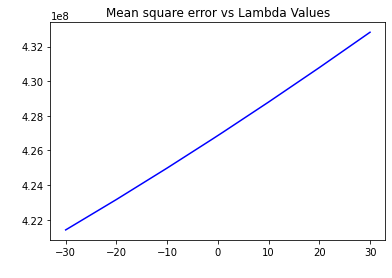

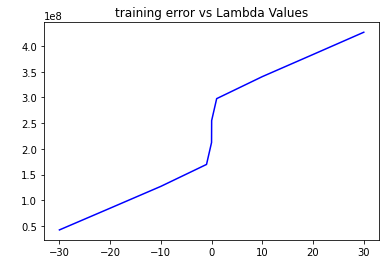

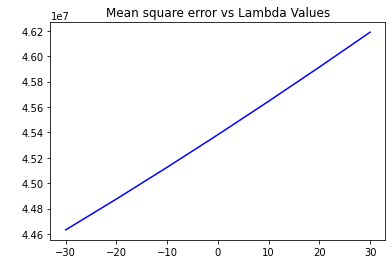

In [61]:
plt.plot(lamda_values,mse_error,color="blue")
plt.title( 'Mean square error vs Lambda Values' )    
plt.xlabel('Lambda Values',color='white')
plt.ylabel( 'Mean square error',color='white') 
plt.show()

plt.plot(lamda_values,training_error,color="blue")
plt.title( 'training error vs Lambda Values' )    
plt.xlabel('Lambda Values',color='white')
plt.ylabel( 'Training error',color='white') 
plt.show()

plt.plot(lamda_values,test_error,color="blue")
plt.title( 'Mean square error vs Lambda Values' )    
plt.xlabel('Lambda Values',color='white')
plt.ylabel( 'Testing error',color='white') 
plt.show()